In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/questions.csv")
df.shape

(404351, 6)

In [3]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
102326,102326,203020,203021,Which beers are similar to Stella Artois?,What can I do with 24 Stella Artois bottles?,0
372420,372420,728712,728713,Is it possible to know if someone saw my Whats...,What is the trick to know my WhatsApp profile ...,1
244767,244767,482043,482044,What shouldi know to buil a website?,I have never made a website and don't know how...,0
238529,238529,469865,469866,How bad is 6/18 eyesight?,How was bad eyesight dealt with in ancient and...,0
134386,134386,266124,266125,Which is the best whey protein in the market?,Which whey protein shoud I use?,1
247224,247224,486828,486829,What country has never kicked out the jews?,Is there any particular way to explain a movie...,0
232656,232656,458388,458389,What are the expected consequences of Declarin...,What will be the consequences of 500 and 1000 ...,1
246500,246500,485424,485425,Can I use Jio in iPhone 5s?,How do I get Jio sim for iPhone 5s?,1
150671,150671,298059,298060,Is reading in the night not as efficient as re...,Why is it that I can read so fast at night but...,1
318481,318481,624891,624892,What is the best app for gate exam?,What is some good preparation for the GATE exam?,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [5]:
# missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
# duplicate rows
df.duplicated().sum()

0

0    255045
1    149306
Name: is_duplicate, dtype: int64
0    63.07515
1    36.92485
Name: is_duplicate, dtype: float64


<AxesSubplot:>

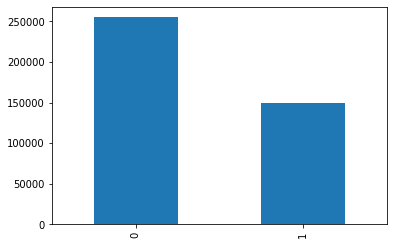

In [7]:
# Distribution of duplicate and non-duplicate questions

print(df['is_duplicate'].value_counts())
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)
df['is_duplicate'].value_counts().plot(kind='bar')

In [8]:
# Repeated questions

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions',np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated',x[x].shape[0])

Number of unique questions 789801
Number of questions getting repeated 13698


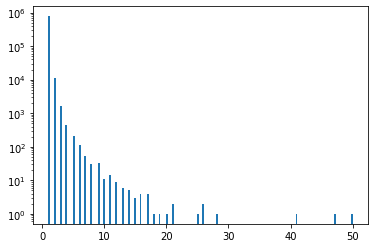

In [9]:
# Repeated questions histogram

plt.hist(qid.value_counts().values,bins=160)
plt.yscale('log')
plt.show()